In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#sns.set(font_scale = 2,rc={'text.usetex': True})
sns.set_style("whitegrid")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
def rename_dataset(name): 
    rename_map = {
        
    }
    
    new_name = rename_map.get(name)
    if not new_name: 
        return name.capitalize()
    else: 
        return new_name
    
    
def generate_table(algorithms, datamap): 
    # ITML               & LMNN              & LFDA              & LSML  & MLKR              & MMC               & NCA               & LPTML$_{t=2000}$
    line1 ="\\toprule\nData set (N,Features,Classes)  & " + " & ".join(algorithms) + "\\\\" + "\n\\midrule"
    lines = [line1]
    for dataset in datamap.keys(): 
        lines.append(f"{dataset} & {' & '.join([datamap[dataset][algoname] for algoname in algorithms])} \\\\" )
    return "\n".join([*lines, "\\bottomrule"])

In [19]:
df = pd.read_csv("new_poisoned_results.csv")
df["algorithm"] = df["algorithm"].apply(lambda x: x.replace("_Supervised", ""))
df["dataset_name"] = df["dataset_name"].apply(lambda x: rename_dataset(x))
df.reset_index(inplace=True, drop=True)
df = df[(df["algorithm"] != "RCA")]
df["accuracy"] = 1 - df["accuracy"]
df.rename(columns={"accuracy": "error"}, inplace=True)
df = df[df["dataset_name"] != "Synthetic_poisoned"]
df.head()

,algorithm,dataset_name,dataset_dimensions(elements|features|classes),PCA,adversarial_noise,error,precision,recall,f1
0,MMC,Wine_poisoned,(195|10|3),4,0,0.265306,0.716967,0.715739,0.716032
1,LSML,Wine_poisoned,(195|10|3),4,0,0.285714,0.723990,0.706373,0.705769
2,ITML,Wine_poisoned,(195|10|3),4,0,0.377551,0.620843,0.605093,0.591210
3,NCA,Wine_poisoned,(195|10|3),4,0,0.367347,0.621505,0.636798,0.626144
4,MLKR,Wine_poisoned,(195|10|3),4,0,0.295918,0.672828,0.673271,0.662718


<Figure size 2880x1440 with 0 Axes>

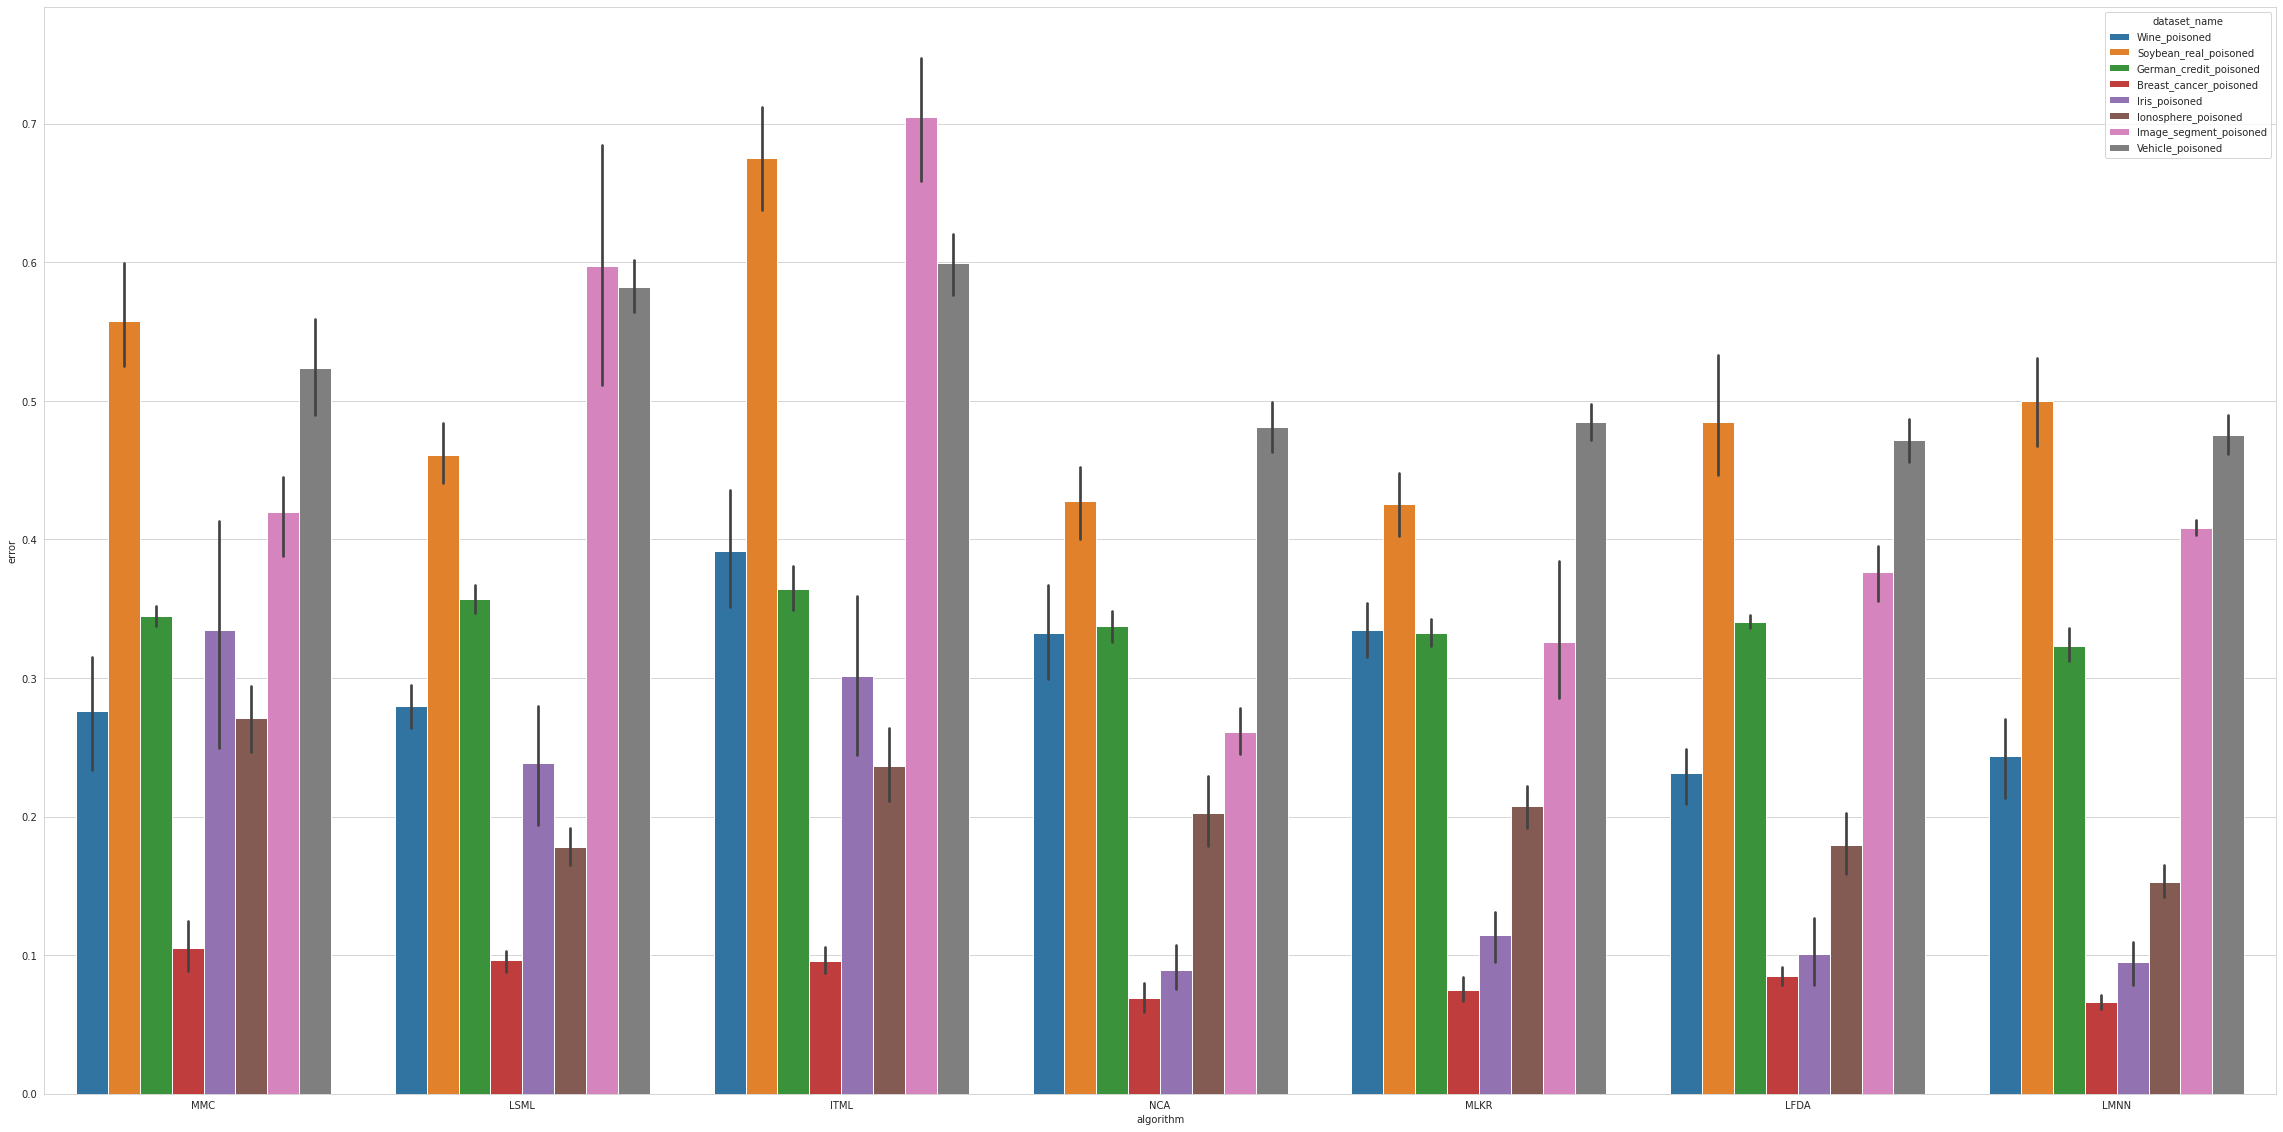

In [20]:
# Accuracy plot
plt.figure(figsize=(40, 20))
accuracy_df = df[["algorithm", "dataset_name", "adversarial_noise", "error"]][df["adversarial_noise"] == 0]
sns.barplot(x="algorithm", y="error", hue="dataset_name", data=accuracy_df)
plt.savefig("tmp.png")

In [37]:
datasets = df["dataset_name"].unique()
algorithms = df["algorithm"].unique()
df_map = {}

for d in datasets: 
    df_map[d] = {}
    for a in algorithms: 
        selected_rows = df[(df["dataset_name"] == d) & (df["algorithm"] == a)]["error"]
        df_map[d][a] = f"${np.round(selected_rows.mean(), 3)} \pm {np.round(selected_rows.std(), 3)}$"


In [38]:
table = generate_table(algorithms, df_map)

In [39]:
print(table)

\toprule
Data set (N,Features,Classes)  & MMC & LSML & ITML & NCA & MLKR & LFDA & LMNN\\
\midrule
Wine_poisoned & $0.277 \pm 0.069$ & $0.28 \pm 0.026$ & $0.392 \pm 0.078$ & $0.333 \pm 0.059$ & $0.335 \pm 0.033$ & $0.232 \pm 0.034$ & $0.244 \pm 0.052$ \\
Soybean_real_poisoned & $0.557 \pm 0.064$ & $0.461 \pm 0.038$ & $0.675 \pm 0.065$ & $0.427 \pm 0.044$ & $0.426 \pm 0.04$ & $0.485 \pm 0.075$ & $0.5 \pm 0.052$ \\
German_credit_poisoned & $0.345 \pm 0.012$ & $0.357 \pm 0.017$ & $0.364 \pm 0.026$ & $0.337 \pm 0.019$ & $0.332 \pm 0.017$ & $0.341 \pm 0.008$ & $0.323 \pm 0.021$ \\
Breast_cancer_poisoned & $0.105 \pm 0.032$ & $0.097 \pm 0.013$ & $0.096 \pm 0.017$ & $0.069 \pm 0.018$ & $0.075 \pm 0.016$ & $0.085 \pm 0.011$ & $0.066 \pm 0.009$ \\
Iris_poisoned & $0.335 \pm 0.141$ & $0.239 \pm 0.073$ & $0.301 \pm 0.098$ & $0.089 \pm 0.03$ & $0.114 \pm 0.032$ & $0.101 \pm 0.041$ & $0.095 \pm 0.028$ \\
Ionosphere_poisoned & $0.272 \pm 0.041$ & $0.178 \pm 0.022$ & $0.237 \pm 0.045$ & $0.203 \pm 0.0

In [33]:
df_map

{'Wine_poisoned': {'MMC': '0.27653061224489794 \\pm 0.06861143687616142',
  'LSML': '0.2795918367346938 \\pm 0.025993160781690894',
  'ITML': '0.39183673469387753 \\pm 0.07848229476103175',
  'NCA': '0.33265306122448973 \\pm 0.05875598063044677',
  'MLKR': '0.3346938775510204 \\pm 0.03325688860293964',
  'LFDA': '0.2316326530612245 \\pm 0.0340306079953218',
  'LMNN': '0.24387755102040817 \\pm 0.051685013738041866'},
 'Soybean_real_poisoned': {'MMC': '0.5574999999999999 \\pm 0.06440162610093354',
  'LSML': '0.46125000000000005 \\pm 0.03816539299184828',
  'ITML': '0.675 \\pm 0.06521864934374387',
  'NCA': '0.42749999999999994 \\pm 0.04381938941711637',
  'MLKR': '0.425625 \\pm 0.03979657474093859',
  'LFDA': '0.48500000000000004 \\pm 0.07483778754375656',
  'LMNN': '0.5 \\pm 0.05210416250166583'},
 'German_credit_poisoned': {'MMC': '0.34472727272727277 \\pm 0.012217797011737344',
  'LSML': '0.35709090909090907 \\pm 0.016995651147957435',
  'ITML': '0.36418181818181816 \\pm 0.02633471070

In [58]:
df = pd.read_csv("LPTML_results2000itfinal.csv")

In [59]:
df = df[df["algorithm"] == "EUCLIDEAN"]

In [60]:
poisoned_ds = [el for el in df["dataset_name"].unique() if "poisoned" in el]

In [61]:
df = df[df["dataset_name"].isin(poisoned_ds)]

In [63]:
df["avg_accuracy"].mean()

0.4409166666666666